# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
#pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 654


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | puerto quijarro
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | vigrestad
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | rapid valley
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | port hardy
Processing Record 11 of Set 1 | majholi
Processing Record 12 of Set 1 | catuday
Processing Record 13 of Set 1 | luba
Processing Record 14 of Set 1 | tatarsk
Processing Record 15 of Set 1 | tezu
Processing Record 16 of Set 1 | katobu
Processing Record 17 of Set 1 | zambezi
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | boende
Processing Record 22 of Set 1 | ocos
Processing Record 23 of S

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,24.54,77,74,2.68,ZA,1674545639
1,kavieng,-2.5744,150.7967,28.37,75,94,4.04,PG,1674545640
2,puerto quijarro,-17.7833,-57.7667,22.78,99,100,0.76,BO,1674545641
3,cherskiy,68.7500,161.3000,-29.15,96,100,0.36,RU,1674545641
4,vigrestad,58.5667,5.7000,6.82,97,100,3.22,NO,1674545642


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,24.54,77,74,2.68,ZA,1674545639
1,kavieng,-2.5744,150.7967,28.37,75,94,4.04,PG,1674545640
2,puerto quijarro,-17.7833,-57.7667,22.78,99,100,0.76,BO,1674545641
3,cherskiy,68.7500,161.3000,-29.15,96,100,0.36,RU,1674545641
4,vigrestad,58.5667,5.7000,6.82,97,100,3.22,NO,1674545642


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

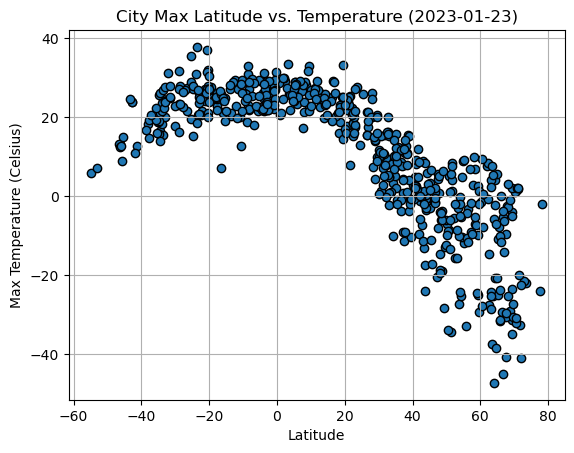

In [28]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-01-23)")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

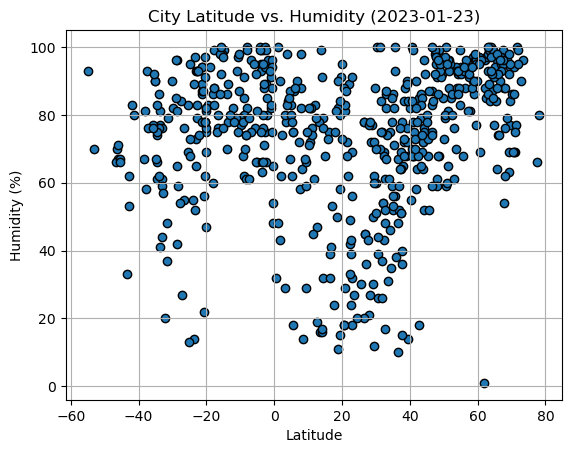

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-01-23)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

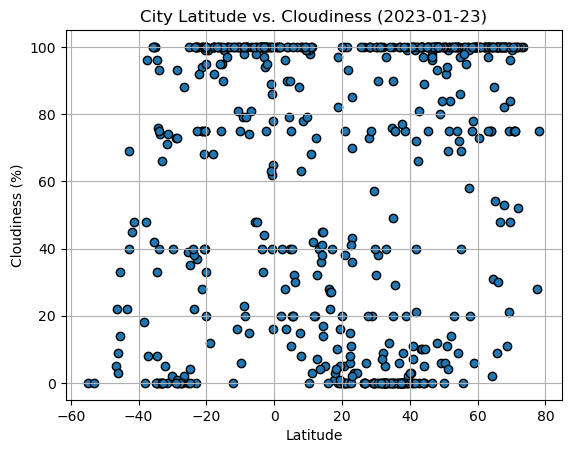

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-01-23)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

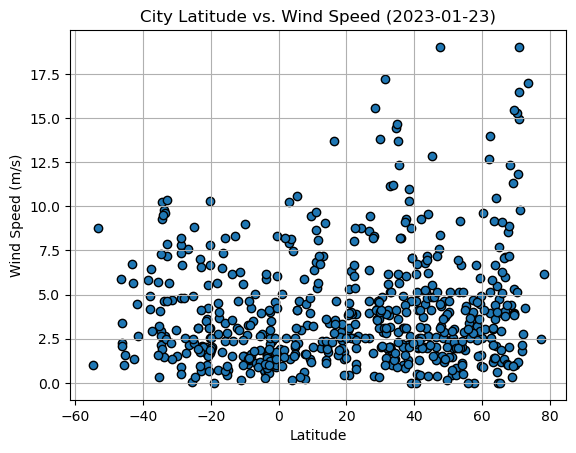

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-01-23)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, annotate_xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,annotate_xy,fontsize=15,color="red")
    print(f"The r-vlaue is: {rvalue}")
    plt.show()

    

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,cherskiy,68.7500,161.3000,-29.15,96,100,0.36,RU,1674545641
4,vigrestad,58.5667,5.7000,6.82,97,100,3.22,NO,1674545642
6,rapid valley,44.0625,-103.1463,-0.82,76,0,2.68,US,1674545643
7,tuktoyaktuk,69.4541,-133.0374,-23.38,94,100,3.96,CA,1674545644
9,port hardy,50.6996,-127.4199,5.10,100,100,5.14,CA,1674545410


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,24.54,77,74,2.68,ZA,1674545639
1,kavieng,-2.5744,150.7967,28.37,75,94,4.04,PG,1674545640
2,puerto quijarro,-17.7833,-57.7667,22.78,99,100,0.76,BO,1674545641
5,hermanus,-34.4187,19.2345,16.56,76,76,9.29,ZA,1674545642
8,rikitea,-23.1203,-134.9692,26.16,73,0,7.04,PF,1674545644


###  Temperature vs. Latitude Linear Regression Plot

The r-vlaue is: -0.8314479416986951


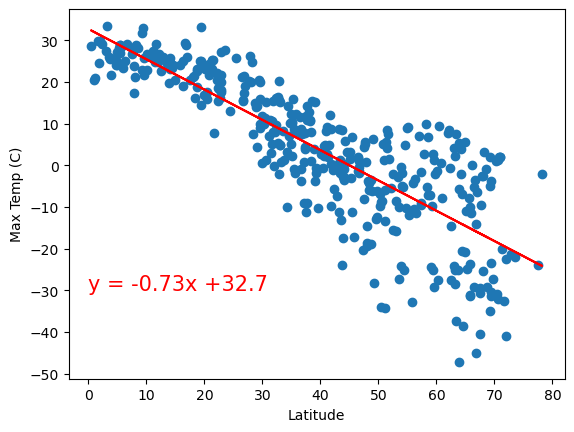

In [59]:
# Linear regression on Northern Hemisphere
createLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)",(0,-30))

The r-vlaue is: 0.46302500326781687


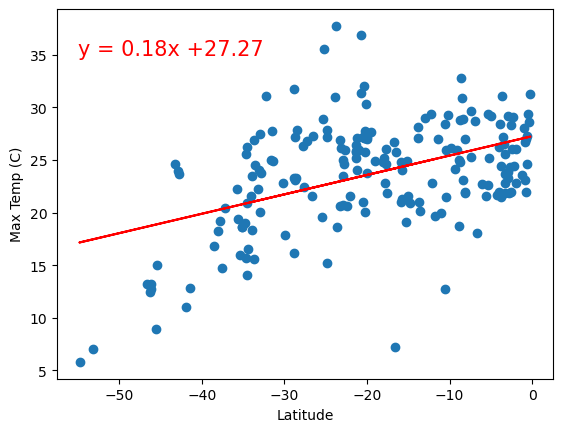

In [64]:
# Linear regression on Southern Hemisphere
createLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp (C)",(-55,35))

**Discussion about the linear relationship:** 
Regression value of -0.83 in Northern Hemisphere shows a strong, negative association between Latitude and Max Temperature, meaning Max Temperature is very likely to drop with an increase in Latitude.
Regression value of 0.46 in Southern Hemisphere shows a weak, positive association between Latitude and Max Temperature, meaning change in Max Temperature is not as dependent on Latitude as it is in the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-vlaue is: 0.4237779981102992


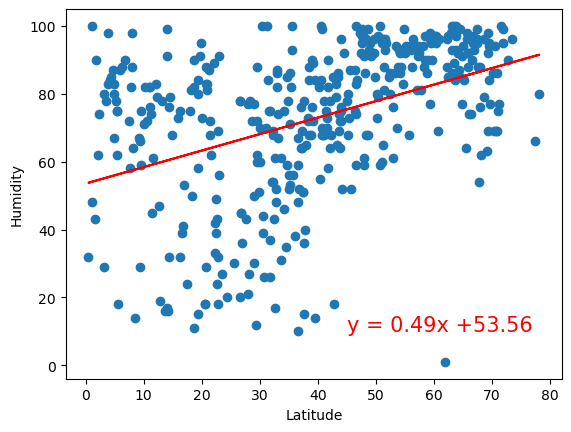

In [66]:
# Northern Hemisphere
createLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity",(45,10))

The r-vlaue is: 0.306038098762386


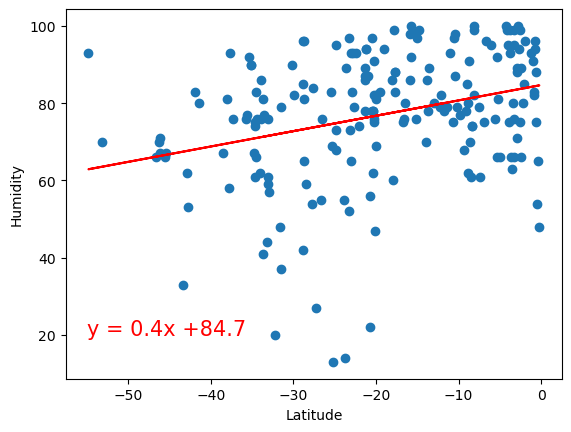

In [68]:
# Southern Hemisphere
createLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity",(-55,20))

**Discussion about the linear relationship:**
Regression value of 0.42 in Northern Hemisphere shows a weak, positive association between Latitude and Humidity, meaning Latitude is not a good indicator of Humidity.
Regression value of 0.30 in Southern Hemisphere shows an even weaker, positive association between Latitude and Humidity, meaning Latitude is not a good indicator of Humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-vlaue is: 0.35087903958302386


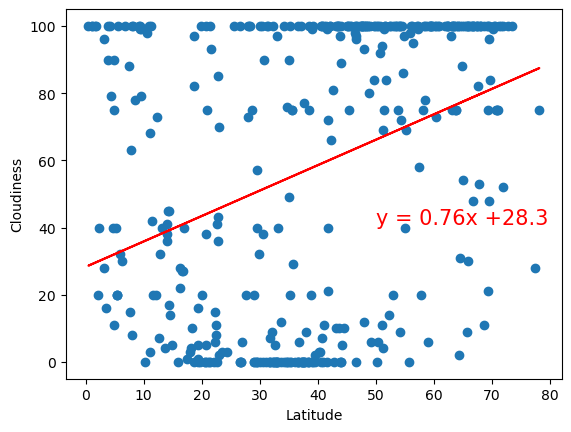

In [73]:
# Northern Hemisphere
createLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness",(50,41))

The r-vlaue is: 0.5219472435348238


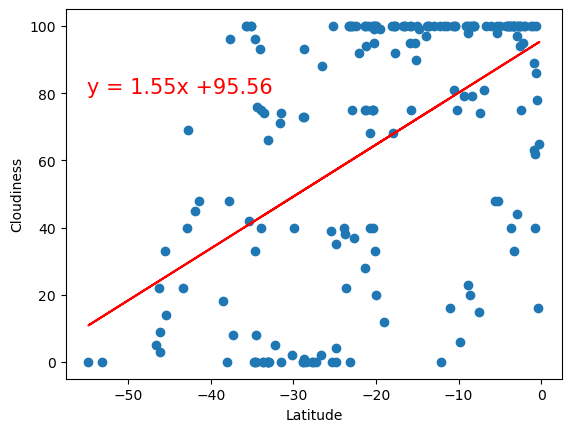

In [75]:
# Southern Hemisphere
createLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness",(-55,80))

**Discussion about the linear relationship:** 
Regression value of 0.35 in Northern Hemisphere shows a weak, positive association between Latitude and Cloudiness, meaning Latitude is not a good indicator of Cloudiness.
Regression value of 0.52 in Southern Hemisphere shows a moderate, positive association between Latitude and Cloudiness, meaning Latitude is not a great indicator of Cloudiness, but better as compared to the Northern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-vlaue is: 0.09208764051173925


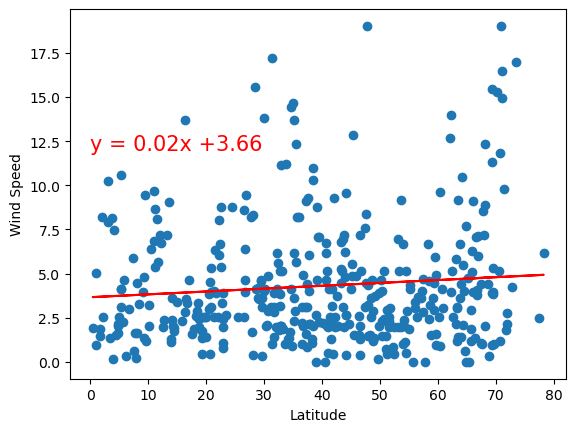

In [79]:
# Northern Hemisphere
createLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed",(0,12))

The r-vlaue is: -0.28212950501706835


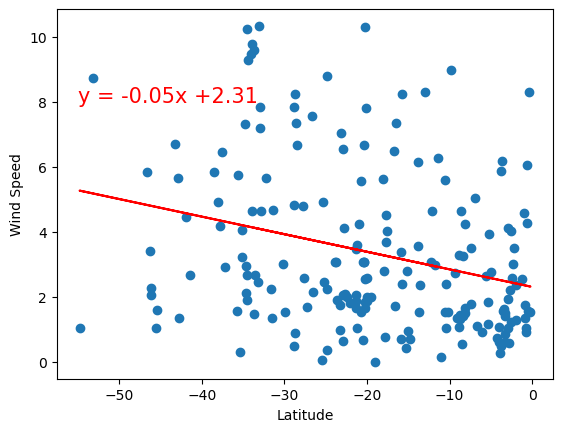

In [81]:
# Southern Hemisphere
createLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed",(-55,8))

**Discussion about the linear relationship:** 
Regression value of 0.09 in Northern Hemisphere shows almost no association between Latitude and Wind Speed, meaning Latitude has almost nothing to do with Wind Speed.
Regression value of -0.28 in Southern Hemisphere shows a very weak, negative association between Latitude and Wind Speed, meaning increase in Latitude may play a small role in decrease of Wind Speed.